In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris.data

Text(0.5, 0, 'petal length (cm)')

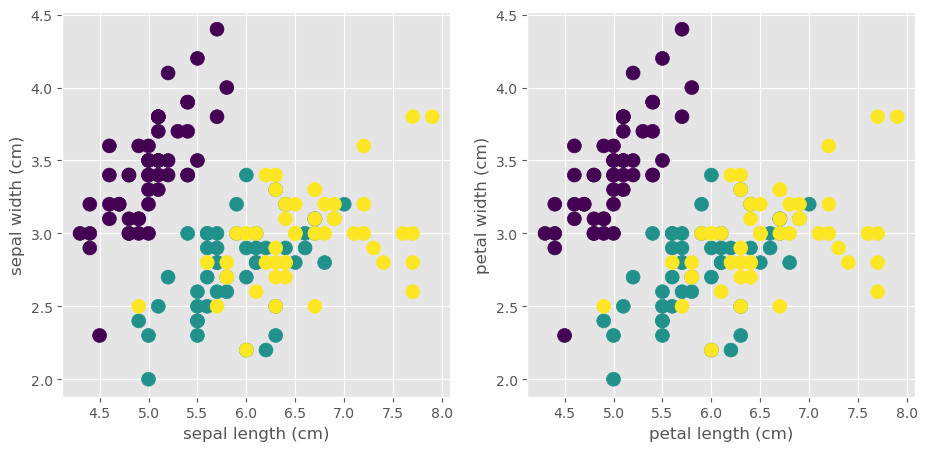

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
ax1.scatter(x='sepal length (cm)', y='sepal width (cm)', c= iris.target, s=100, data=iris_df)
ax2.scatter(x='sepal length (cm)', y='sepal width (cm)', c= iris.target, s=100, data=iris_df)
ax1.set_ylabel('sepal width (cm)')
ax1.set_xlabel('sepal length (cm)')
ax2.set_ylabel('petal width (cm)')
ax2.set_xlabel('petal length (cm)')

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

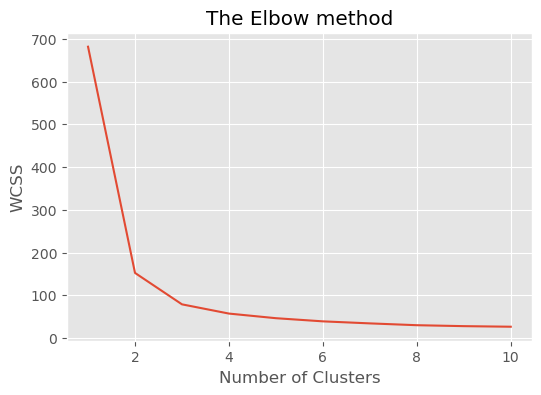

In [7]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

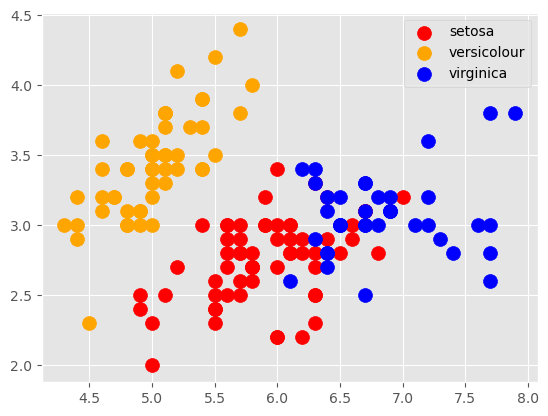

In [9]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='setosa')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='orange', label='versicolour')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='blue', label='virginica')
plt.legend()